In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import json
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
# import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns

# import data 

In [56]:
DATA_FILE = "/gdrive/MyDrive/Colab Notebooks/ssafy/data/data.json"
DUMP_FILE = "/gdrive/MyDrive/Colab Notebooks/ssafy/data/dump.pkl"

store_columns = (
    "id",  # 음식점 고유번호
    "store_name",  # 음식점 이름
    "branch",  # 음식점 지점 여부
    "area",  # 음식점 위치
    "tel",  # 음식점 번호
    "address",  # 음식점 주소
    "latitude",  # 음식점 위도
    "longitude",  # 음식점 경도
    "category",  # 음식점 카테고리
)

review_columns = (
    "id",  # 리뷰 고유번호
    "store",  # 음식점 고유번호
    "user",  # 유저 고유번호
    "score",  # 평점
    "content",  # 리뷰 내용
    "reg_time",  # 리뷰 등록 시간
)

menu_columns = (
    "id",
    "store",
    "menu_name",
    "price",
)

user_columns = (
    "id",
    "gender",
    "age",
)


def import_data(data_path=DATA_FILE):
    try:
        with open(data_path, encoding="utf-8") as f:
            data = json.loads(f.read())
    except FileNotFoundError as e:
        print(f"`{data_path}` 가 존재하지 않습니다.")
        exit(1)

    stores = []  # 음식점 테이블
    reviews = []  # 리뷰 테이블
    menus = [] # 메뉴 테이블
    users = [] # 유저 테이블
    menu_id = 0

    for d in data:
        categories = [c["category"] for c in d["category_list"]]

        if not categories:
            categories.append("알수없음")

        stores.append(
            [
                d["id"],
                d["name"],
                d["branch"],
                d["area"],
                d["tel"],
                d["address"],
                d["latitude"],
                d["longitude"],
                categories[0],
            ]
        )

        for review in d["review_list"]:
            r = review["review_info"]
            u = review["writer_info"]
            if "1900" < u["born_year"] < "2021":
                user_age = 2021 - int(u["born_year"]) + 1

                reviews.append(
                    [r["id"], d["id"], u["id"], r["score"], r["content"], r["reg_time"]]
                )
                users.append(
                    [u["id"], u["gender"], user_age]
                )

        for menu in d["menu_list"]:
            menus.append(
                [menu_id, d["id"], menu["menu"], menu["price"]]
            )
            menu_id +=1

    store_frame = pd.DataFrame(data=stores, columns=store_columns)
    review_frame = pd.DataFrame(data=reviews, columns=review_columns)
    memu_frame = pd.DataFrame(data=menus, columns=menu_columns)
    user_frame = pd.DataFrame(data=users, columns=user_columns)
    
    store_frame["category"].replace("", "알수없음", inplace=True)

    return {"stores": store_frame, "reviews": review_frame, "menus": memu_frame, "users":user_frame}


def dump_dataframes(dataframes):
    pd.to_pickle(dataframes, DUMP_FILE)


def load_dataframes():
    return pd.read_pickle(DUMP_FILE)


print("[*] Parsing data...")
raw_data = import_data()
print("[+] Done")

print("[*] Dumping data...")
dump_dataframes(raw_data)
print("[+] Done\n")

raw_data = load_dataframes()

[*] Parsing data...
[+] Done
[*] Dumping data...
[+] Done



In [57]:
raw_data["stores"][raw_data["stores"]["category"]==""]

,id,store_name,branch,area,tel,address,latitude,longitude,category


In [47]:
raw_data["stores"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459988 entries, 0 to 459987
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          459988 non-null  int64 
 1   store_name  459988 non-null  object
 2   branch      23460 non-null   object
 3   area        443274 non-null  object
 4   tel         449759 non-null  object
 5   address     459931 non-null  object
 6   latitude    459987 non-null  object
 7   longitude   459987 non-null  object
 8   category    459988 non-null  object
dtypes: int64(1), object(8)
memory usage: 31.6+ MB


In [ ]:
MUSLIM_PATH = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/무슬림친화레스토랑.csv'
CSV_MUSLIM_PATH = pd.read_csv(MUSLIM_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_PATH["주소"].head())

0       서울 용산구 우사단로 34 
1       서울 용산구 우사단로 42 
2     부산 금정구 금단로 123-9 
3        인천 연수구 옥련로 31 
4    경남 창원시 성산구 용지로 74 
Name: 주소, dtype: object


In [ ]:
MUSLIM_SEOUL_PATH = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/무슬림서울만.csv'
CSV_MUSLIM_SEOUL = pd.read_csv(MUSLIM_SEOUL_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_SEOUL.head())

   idx store_name                            address category
0    0      우스마니아              서울특별시 용산구 이태원동 137-56   파키스탄음식
1    1  미스터케밥 2호점              서울특별시 용산구 이태원동 136-45     터키음식
2    7        미가미     서울특별시 서초구 서초동 1337-32 서초동 광일빌딩       일식
3    8       패밀리아  서울특별시 강남구 논현동 248-7 임피리얼 팰리스호텔 1층      뷔페식
4    9         깔리                 서울특별시 종로구 명륜4가 171     인도음식


In [ ]:
MUSLIM_REVIEW_PATH = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/무슬림리뷰만.csv'
CSV_MUSLIM_REVIEW = pd.read_csv(MUSLIM_REVIEW_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_REVIEW.head())

  store_name   store
0      우스마니아  308561
1        미가미  155677
2       패밀리아  430186
3         깔리   55195
4      세븐스퀘어  224459


# 전처리

 userID, storeID, rating, title 로 만들기

In [ ]:
#skD
raw_store_table = raw_data["stores"].copy()
store_table = raw_store_table[['id', 'store_name','address']]

raw_review_table = raw_data["reviews"].copy()
review_table = raw_review_table[['store','user','score']]

raw_user_table = raw_data["users"].copy()
user_table = raw_user_table[['id','gender','age']]

#muD
raw_muslim_table = CSV_MUSLIM_SEOUL.copy()
muslim_table = raw_muslim_table[["store_name",'address']]
# muslim_table.columns = ['store_name','M_address']
raw_muslim_review = CSV_MUSLIM_REVIEW.copy()

In [ ]:
review_table["store"].replace(159620, 159619, inplace=True)
review_table["store"].replace(159622, 159619, inplace=True)

0            15
1            18
2            19
3            37
4            38
          ...  
91393    360499
91394    360505
91395    360514
91396    360514
91397    360515
Name: store, Length: 91398, dtype: int64

In [ ]:
musilm_review_table = pd.merge(raw_muslim_review, review_table, on='store', how='left')
print(musilm_review_table.shape)
musilm_review_table.head(20)

(128, 4)


,store_name,store,user,score
0,우스마니아,308561,225842.0,4.0
1,우스마니아,308561,90292.0,4.0
2,미가미,155677,52663.0,5.0
3,패밀리아,430186,NaN,NaN
4,깔리,55195,442382.0,5.0
5,깔리,55195,688218.0,4.0
6,깔리,55195,816257.0,5.0
7,깔리,55195,510431.0,3.0
8,깔리,55195,362703.0,5.0
9,깔리,55195,213564.0,4.0


In [ ]:
musilm_store_table.to_csv('/gdrive/MyDrive/Colab Notebooks/ssafy/MyDF2.csv',encoding="utf-8-sig")

In [ ]:
store_table.head

,id,store_name
0,1,Agal
1,2,Assisy
2,3,Battered Sole
3,4,Chakyoung
4,5,Delabobo


# 분석

In [ ]:
from sklearn.decomposition import TruncatedSVD

user_review_data = userID, storeID, rating, title

In [ ]:
user_store_data = musilm_review_table.copy()

In [ ]:
min(user_store_data["score"])

1.0

In [ ]:
user_store_rating = user_store_data.pivot_table('score',index='user', columns='store_name').fillna(min(user_store_data["score"]))
store_user_rating = user_store_rating.values.T
store_user_rating.shape

(25, 89)

In [ ]:
SVD = TruncatedSVD(n_components=3)

In [ ]:
matrix = SVD.fit_transform(store_user_rating)
matrix.shape

(25, 3)

In [ ]:
corr = np.corrcoef(matrix)
corr.shape

(25, 25)

In [ ]:
store_title = user_store_rating.columns
store_title_list = list(store_title)
store_title_list

['그랜드 키친',
 '깔리',
 '델리인디아',
 '델리팰리스',
 '루나아시아',
 '리틀인디아',
 '명동정',
 '모로코코 카페',
 '미가미',
 '미스터케밥',
 '바바인디아',
 '발우공양',
 '사마르칸트',
 '세븐스퀘어',
 '아건 레스토랑',
 '여우골초밥',
 '예티',
 '오샬',
 '오세계향',
 '옷살',
 '우스마니아',
 '이지인디아',
 '전주식당',
 '종로설렁탕',
 '카페 우즈베키스탄']

In [ ]:
store_title = user_store_rating.columns
store_title_list = list(store_title)
coffey_hands = store_title_list.index("예티")
print(coffey_hands) #인덱스 값 찾기

16


In [ ]:
corr_coffey_hands = corr[coffey_hands]
list(store_title[(corr_coffey_hands >= 0.9)])[:6] # 유사한 식당 10개

['그랜드 키친', '델리인디아', '델리팰리스', '루나아시아', '리틀인디아', '명동정']

Matrix Factorization


https://yamalab.tistory.com/92?category=747907



In [ ]:
import numpy as np


class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        :param R: rating matrix
        :param k: latent parameter
        :param learning_rate: alpha on weight update
        :param reg_param: beta on weight update
        :param epochs: training epochs
        :param verbose: print status
        """

        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        """
        training Matrix Factorization : Update matrix latent weight and bias

        참고: self._b에 대한 설명
        - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
        - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

        :return: training_process
        """

        # init latent features
        self._P = np.random.normal(size=(self._num_users, self._k))
        self._Q = np.random.normal(size=(self._num_items, self._k))

        # init biases
        self._b_P = np.zeros(self._num_users)
        self._b_Q = np.zeros(self._num_items)
        self._b = np.mean(self._R[np.where(self._R != 0)])

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):

            # rating이 존재하는 index를 기준으로 training
            for i in range(self._num_users):
                for j in range(self._num_items):
                    if self._R[i, j] > 0:
                        self.gradient_descent(i, j, self._R[i, j])
            cost = self.cost()
            self._training_process.append((epoch, cost))

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self):
        """
        compute root mean square error
        :return: rmse cost
        """

        # xi, yi: R[xi, yi]는 nonzero인 value를 의미한다.
        # 참고: http://codepractice.tistory.com/90
        xi, yi = self._R.nonzero()
        predicted = self.get_complete_matrix()
        cost = 0
        for x, y in zip(xi, yi):
            cost += pow(self._R[x, y] - predicted[x, y], 2)
        return np.sqrt(cost) / len(xi)


    def gradient(self, error, i, j):
        """
        gradient of latent feature for GD

        :param error: rating - prediction error
        :param i: user index
        :param j: item index
        :return: gradient of latent feature tuple
        """

        dp = (error * self._Q[j, :]) - (self._reg_param * self._P[i, :])
        dq = (error * self._P[i, :]) - (self._reg_param * self._Q[j, :])
        return dp, dq


    def gradient_descent(self, i, j, rating):
        """
        graident descent function

        :param i: user index of matrix
        :param j: item index of matrix
        :param rating: rating of (i,j)
        """

        # get error
        prediction = self.get_prediction(i, j)
        error = rating - prediction

        # update biases
        self._b_P[i] += self._learning_rate * (error - self._reg_param * self._b_P[i])
        self._b_Q[j] += self._learning_rate * (error - self._reg_param * self._b_Q[j])

        # update latent feature
        dp, dq = self.gradient(error, i, j)
        self._P[i, :] += self._learning_rate * dp
        self._Q[j, :] += self._learning_rate * dq


    def get_prediction(self, i, j):
        """
        get predicted rating: user_i, item_j
        :return: prediction of r_ij
        """
        return self._b + self._b_P[i] + self._b_Q[j] + self._P[i, :].dot(self._Q[j, :].T)


    def get_complete_matrix(self):
        """
        computer complete matrix PXQ + P.bias + Q.bias + global bias

        - PXQ 행렬에 b_P[:, np.newaxis]를 더하는 것은 각 열마다 bias를 더해주는 것
        - b_Q[np.newaxis:, ]를 더하는 것은 각 행마다 bias를 더해주는 것
        - b를 더하는 것은 각 element마다 bias를 더해주는 것

        - newaxis: 차원을 추가해줌. 1차원인 Latent들로 2차원의 R에 행/열 단위 연산을 해주기위해 차원을 추가하는 것.

        :return: complete matrix R^
        """
        return self._b + self._b_P[:, np.newaxis] + self._b_Q[np.newaxis:, ] + self._P.dot(self._Q.T)


    def print_results(self):
        """
        print fit results
        """

        print("User Latent P:")
        print(self._P)
        print("Item Latent Q:")
        print(self._Q.T)
        print("P x Q:")
        print(self._P.dot(self._Q.T))
        print("bias:")
        print(self._b)
        print("User Latent bias:")
        print(self._b_P)
        print("Item Latent bias:")
        print(self._b_Q)
        print("Final R matrix:")
        print(self.get_complete_matrix())
        print("Final RMSE:")
        print(self._training_process[self._epochs-1][1])


# run example
if __name__ == "__main__":
    # rating matrix - User X Item : (7 X 5)
    R = np.array([
        [1, 0, 0, 1, 3],
        [2, 0, 3, 1, 1],
        [1, 2, 0, 5, 0],
        [1, 0, 0, 4, 4],
        [2, 1, 5, 4, 0],
        [5, 1, 5, 4, 0],
        [0, 0, 0, 1, 0],
    ])

    # P, Q is (7 X k), (k X 5) matrix
    factorizer = MatrixFactorization(R, k=3, learning_rate=0.01, reg_param=0.01, epochs=300, verbose=True)
    factorizer.fit()
    factorizer.print_results()

Iteration: 10 ; cost = 0.2490
Iteration: 20 ; cost = 0.1810
Iteration: 30 ; cost = 0.1478
Iteration: 40 ; cost = 0.1245
Iteration: 50 ; cost = 0.1040
Iteration: 60 ; cost = 0.0850
Iteration: 70 ; cost = 0.0685
Iteration: 80 ; cost = 0.0552
Iteration: 90 ; cost = 0.0452
Iteration: 100 ; cost = 0.0378
Iteration: 110 ; cost = 0.0324
Iteration: 120 ; cost = 0.0282
Iteration: 130 ; cost = 0.0249
Iteration: 140 ; cost = 0.0222
Iteration: 150 ; cost = 0.0200
Iteration: 160 ; cost = 0.0180
Iteration: 170 ; cost = 0.0164
Iteration: 180 ; cost = 0.0149
Iteration: 190 ; cost = 0.0136
Iteration: 200 ; cost = 0.0125
Iteration: 210 ; cost = 0.0115
Iteration: 220 ; cost = 0.0106
Iteration: 230 ; cost = 0.0098
Iteration: 240 ; cost = 0.0091
Iteration: 250 ; cost = 0.0085
Iteration: 260 ; cost = 0.0080
Iteration: 270 ; cost = 0.0075
Iteration: 280 ; cost = 0.0070
Iteration: 290 ; cost = 0.0066
Iteration: 300 ; cost = 0.0063
User Latent P:
[[ 0.5618006   0.57537486  0.63126051]
 [-0.91539844 -0.09032298

# clustering

In [20]:
print(raw_data["users"].shape)
raw_data["users"].drop_duplicates()
print(raw_data["users"].shape)

(91357, 3)
(91357, 3)


In [21]:
raw_data["users"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91357 entries, 0 to 91356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      91357 non-null  int64 
 1   gender  91357 non-null  object
 2   age     91357 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ MB


In [ ]:
# user data만 뽑고 중복 제거해서 유저 데이터 모음
musilm_user = raw_data["users"]
musilm_user.drop_duplicates(inplace=True)
musilm_user.dropna(inplace=True)

In [ ]:
musilm_user.shape

(89,)

In [ ]:
# user 데이터와 merge 해서 데이터 추출
musilm_review_user = pd.merge(musilm_user, user_table, left_on='user', right_on='id', how='inner')
musilm_review_user.drop_duplicates(inplace=True)
print(musilm_review_user.shape)
musilm_review_user.reset_index(drop=True, inplace=True)
musilm_review_user.head()

(89, 4)


,user,id,gender,age
0,225842.0,225842,여,23
1,90292.0,90292,여,26
2,52663.0,52663,여,29
3,442382.0,442382,여,27
4,688218.0,688218,여,29


In [25]:
#나이만 추출
musilm_user = raw_data["users"]
musilm_only_user = musilm_user[["id","age"]]
#정규화
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(musilm_only_user)
musilm_only_user_normal= pd.DataFrame(features_normal ,columns=['nor_user', 'nor_age',])

musilm_review_nor_user = pd.concat([musilm_user, musilm_only_user_normal], axis=1)
musilm_review_nor_user.head()

,id,gender,age,nor_user,nor_age
0,68632,남,32,0.072212,0.321839
1,389728,여,29,0.410093,0.287356
2,68716,여,38,0.072301,0.390805
3,774353,여,50,0.814823,0.528736
4,115682,남,31,0.121722,0.310345


In [69]:
# user data
musilm_user = raw_data["users"]
# gender string to bool
musilm_user["gender_m"] = musilm_user["gender"].apply(lambda x: 1 if x=='남' else 0 )
musilm_user["gender_f"] = musilm_user["gender"].apply(lambda x: 1 if x=='여' else 0 )
# normalization
df_scaler = musilm_user[["age","id"]]
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(df_scaler)
df_scaler_normal= pd.DataFrame(features_normal ,columns=['nor_age', 'nor_id'])

musilm_review_nor_user = pd.concat([musilm_user, df_scaler_normal], axis=1)

df_review_user = musilm_review_nor_user[["id","nor_age","gender_m","gender_f"]]
df_review_user.head()

,id,nor_age,gender_m,gender_f
0,68632,0.321839,1,0
1,389728,0.287356,0,1
2,68716,0.390805,0,1
3,774353,0.528736,0,1
4,115682,0.310345,1,0


k-means

In [44]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_without_id)
    kmeanModel.fit(df_without_id)
    inertia.append(kmeanModel.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd75c7ad810>,
                 k=None, metric=None, model=None, timings=True)

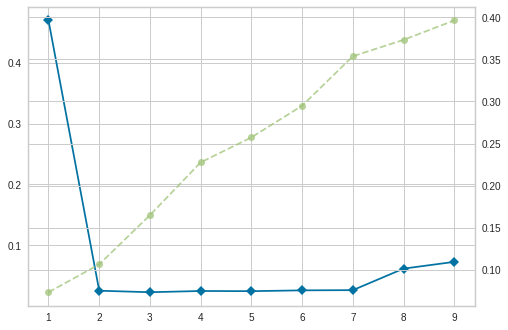

In [38]:
from yellowbrick.cluster import KElbowVisualizer
# df_review_user = muslim_review_nor_user[["id","nor_age","gender_m","gender_f",'nor_reviews']]
df_without_id = df_review_user[["nor_age","gender_m","gender_f",'nor_reviews']]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_without_id)

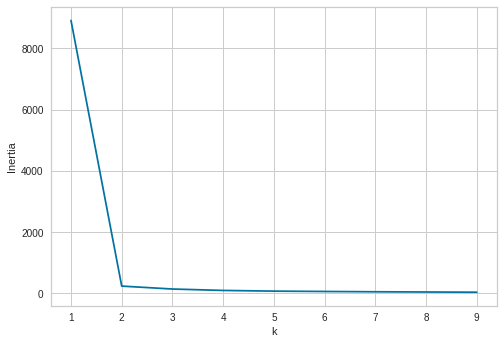

In [45]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=3).fit(features_normal)

In [57]:
# labels = pd.DataFrame(kmeans.labels_)
# labeledColleges = pd.concat((musilm_user,labels),axis=1)
# labeledColleges = labeledColleges.rename({0:'labels'},axis=1)

kmeans = KMeans(n_clusters=3).fit(features_normal)
labels = pd.DataFrame(kmeans.labels_)
labeledColleges = pd.concat((df_review_user,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)

In [58]:
labeledColleges.head()

,id,nor_age,gender_m,gender_f,labels
0,68632,0.321839,1,0,0
1,389728,0.287356,0,1,2
2,68716,0.390805,0,1,0
3,774353,0.528736,0,1,1
4,115682,0.310345,1,0,0


In [59]:
labeledColleges.columns

Index(['id', 'nor_age', 'gender_m', 'gender_f', 'labels'], dtype='object')

In [96]:
musilm_user = raw_data["users"]
musilm_user.shape

(91357, 3)

# 연습장

In [89]:
muslim_review = raw_data["reviews"].copy(deep=True)
muslim_review_col=muslim_review[["store","user","score"]]
print(muslim_review_col.shape)
muslim_review_nor_user = pd.concat([muslim_review_col, CSV_REVIEW])
print(muslim_review_nor_user.shape)
print(muslim_review_nor_user.head())

(91357, 3)
(183755, 3)
   store    user  score
0     15   68632      5
1     18  389728      5
2     19   68716      4
3     37  774353      2
4     38  115682      3


In [95]:
df_users_with_reviews = muslim_review_nor_user["user"].value_counts().rename_axis('user').reset_index(name='reviews')
print(df_users_with_reviews.shape)
df_users_with_reviews.head()

(18992, 2)


,user,reviews
0,469245,928
1,243883,782
2,328775,768
3,391794,730
4,74999,709


In [94]:
# musilm_review_user = pd.merge(musilm_user, user_table, left_on='user', right_on='id', how='inner')
print(labeledColleges.shape)
print(df_users_with_reviews.shape)
df_sum = pd.merge(labeledColleges,df_users_with_reviews, left_on='id', right_on='user')
print(df_sum.shape)

(91357, 5)
(18992, 2)
(91357, 7)


In [97]:
df_sum.head()

,id,nor_age,gender_m,gender_f,labels,user,reviews
0,68632,0.321839,1,0,0,68632,242
1,68632,0.321839,1,0,0,68632,242
2,68632,0.321839,1,0,0,68632,242
3,68632,0.321839,1,0,0,68632,242
4,68632,0.321839,1,0,0,68632,242


In [98]:
df_sum.drop_duplicates(inplace=True)
df_sum.shape

(18979, 7)

In [101]:
df_sum.drop("user", axis=1, inplace=True)
df_sum.head()

,id,nor_age,gender_m,gender_f,labels,reviews
0,68632,0.321839,1,0,0,242
121,389728,0.287356,0,1,1,426
333,68716,0.390805,0,1,1,116
390,774353,0.528736,0,1,1,42
411,115682,0.310345,1,0,0,120


In [59]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
X = sparse_random(100, 100, density=0.01, format='csr',random_state=42)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)
TruncatedSVD(n_components=5, n_iter=7, random_state=42)
print(svd.explained_variance_ratio_)

[0.0646051  0.06339479 0.06394407 0.05352903 0.04062679]


# 정리

In [25]:
REVIEW_PATH = '/gdrive/MyDrive/Colab Notebooks/ssafy/data/review_data2.csv'
CSV_REVIEW = pd.read_csv(REVIEW_PATH, engine='python', encoding='cp949')
print(CSV_REVIEW.shape)

(93357, 3)


In [41]:
# user data
muslim_user = raw_data["users"].copy(deep=True)
muslim_review = raw_data["reviews"].copy(deep=True)
# gender string to bool
muslim_user["gender_m"] = muslim_user["gender"].apply(lambda x: 1 if x=='남' else 0 )
muslim_user["gender_f"] = muslim_user["gender"].apply(lambda x: 1 if x=='여' else 0 )
# reviews cnt
muslim_review_col=muslim_review[["store","user","score"]]
muslim_review_nor_user = pd.concat([muslim_review_col, CSV_REVIEW])
df_users_with_reviews = muslim_review_nor_user["user"].value_counts().rename_axis('user').reset_index(name='reviews')
df_user_review_cnt = pd.merge(muslim_user,df_users_with_reviews, left_on='id', right_on='user')
df_user_review_cnt.drop_duplicates(inplace=True)
df_user_review_cnt.reset_index(inplace=True)
# normalization
df_scaler = df_user_review_cnt[["age","reviews"]]
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(df_scaler)
df_scaler_normal= pd.DataFrame(features_normal ,columns=['nor_age', 'nor_reviews'])
muslim_review_nor_user = pd.concat([df_user_review_cnt, df_scaler_normal], axis=1)
df_review_user = muslim_review_nor_user[["id","nor_age","gender_m","gender_f",'nor_reviews']]

df_without_id = df_review_user[["nor_age","gender_m","gender_f",'nor_reviews']]
kmeans = KMeans(n_clusters=3).fit(df_without_id)
labels = pd.DataFrame(kmeans.labels_)
labeledColleges = pd.concat((df_review_user,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)
labeledColleges.head()

,id,nor_age,gender_m,gender_f,nor_reviews,labels
0,68632,0.321839,1,0,0.261622,1
1,389728,0.287356,0,1,0.462703,0
2,68716,0.390805,0,1,0.124324,0
3,774353,0.528736,0,1,0.043243,0
4,115682,0.310345,1,0,0.129730,1


In [42]:
labeledColleges.columns

Index(['id', 'nor_age', 'gender_m', 'gender_f', 'nor_reviews', 'labels'], dtype='object')

# classification

In [17]:
raw_data["users"].describe()

,id,age
count,91357.000000,91357.000000
mean,324468.592303,35.513283
std,255882.004260,8.626258
min,7.000000,4.000000
25%,127113.000000,30.000000
50%,255093.000000,33.000000
75%,469245.000000,40.000000
max,950331.000000,91.000000


In [43]:
labeledColleges.values

array([[6.86320000e+04, 3.21839080e-01, 1.00000000e+00, 0.00000000e+00,
        2.61621622e-01, 1.00000000e+00],
       [3.89728000e+05, 2.87356322e-01, 0.00000000e+00, 1.00000000e+00,
        4.62702703e-01, 0.00000000e+00],
       [6.87160000e+04, 3.90804598e-01, 0.00000000e+00, 1.00000000e+00,
        1.24324324e-01, 0.00000000e+00],
       ...,
       [2.80855000e+05, 3.44827586e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [4.56281000e+05, 5.86206897e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.00000000e+00],
       [1.73710000e+04, 3.67816092e-01, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [60]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# dataset = pandas.read_csv(url, names=names)


dataset= labeledColleges
# Index(['id', 'nor_age', 'gender_m', 'gender_f', 'nor_reviews', 'labels']

#######Evaluate Some Algorithms########


#Create a Validation Dataset
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)



########Build Models########
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


########Make Predictions########
print('######## Make Predictions ########')
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.487665 (0.005961)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.989396 (0.002431)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.998167 (0.000416)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.999767 (0.000174)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.994103 (0.000709)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.920846 (0.002621)
######## Make Predictions ########
0.998577057793345
[[8347    0    7]
 [   0 3838    5]
 [  10    4 6061]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8354
         1.0       1.00      1.00      1.00      3843
         2.0       1.00      1.00      1.00      6075

    accuracy                           1.00     18272
   macro avg       1.00      1.00      1.00     18272
weighted avg       1.00      1.00      1.00     18272

